# Le Debruiteur
* Jonas Freiburghaus
* Romain Capocasale
* He-Arc, INF3dlm-a
* Image Processing course
* 2019-2020

## Statistics

In [1]:
from debruiteur.generator.datagenerator import DataGenerator
from debruiteur.plots.plots import *
from debruiteur.preprocessing.preprocessor import *
from debruiteur.noise.noise import *
from debruiteur.utils.utils import load_model, split_train_val_df
from debruiteur.noise.filters import *
from debruiteur.statistics.statistics import * 
from debruiteur.metrics.metrics import *

In [2]:
noise_class_list = [
    GaussianNoise(mean=0, std=20),
    PoissonNoise(),
    UniformNoise(amplitude=100),
    SaltPepperNoise(freq=0.3),
    SquareMaskNoise(mask_shape=(10, 10), freq=0.1),
    SpeckleNoise(),
]

### Load data

In [3]:
working_dir = os.path.abspath(os.getcwd())

df_original = make_original_dataframe(os.path.join(working_dir, "images"))
df_resized = make_resized_dataframe(df_original, img_shape=(100, 100), resized_path=os.path.join(working_dir, "resized_images"))
df_noised = make_noised_dataframe(df_resized, noise_class_list, os.path.join(working_dir, "noised_images"))

### Metrics

Mean squared error (MSE) :
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Normalized root mean squared error (NRMSE) :
$$\text{NRMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(\log{\frac{\hat{y} + 1}{y + 1}}\right)^2}$$

Peak signal to noise ration (PSNR) :
$$\text{PSNR} = 10 \dot \log_{10} \left( \frac{{MAX_{I}^2}}{MSE} \right)$$

Structural similarity (SSIM) :
$$\text{SSIM(x, y)} = \frac{(2\mu_x \mu_y + c_1)(2\sigma_{xy} + c_2)}{(\mu_x^2 + \mu_y^2 + c_1)(\sigma_x^2 + \sigma_y^2 + c_2)}$$

### Show metrics example

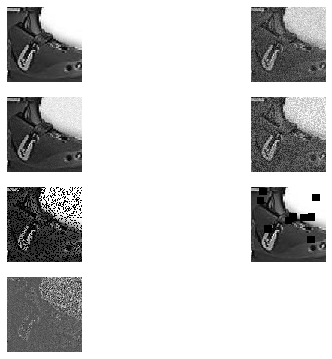

,Noise,MSE,NRMSE,PSNR,SSIM
0,GaussianNoise,407.175032,0.148601,22.032992,0.426360
1,PoissonNoise,18658.066300,1.005922,5.422137,0.451010
2,UniformNoise,3319.197336,0.424275,12.920473,0.302649
3,SaltPepperNoise,5191.615700,0.530618,10.977778,0.238466
4,SquareMaskNoise,2023.462200,0.331267,15.069853,0.821220
5,SpeckleNoise,18723.937584,1.007696,5.406832,0.134769


In [4]:
metrics_example(df_noised, noise_class_list)

### Create data generator

In [5]:
stats_gen = DataGenerator(df_noised[0:20], batch_size=20)

### Load models

In [6]:
conv_ae_model = load_model(os.path.join(working_dir, "saved_models"), "conv_autoencoder.h5")
dense_ae_model = load_model(os.path.join(working_dir, "saved_models"), "dense_autoencoder.h5")
gan_model = load_model(os.path.join(working_dir, "saved_models"), "gan_generator.h5")

C:\Users\Romain\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\layers\core.py:986: UserWarning: debruiteur.models.gan is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


### Noise reduction methods

In [7]:
noise_reduction_methods = [('Wiener Filter', lambda img: wiener_filter(img * 255)),
                           ('Laplacian Filter', lambda img: laplacian_filter(img * 255)),
                           ('Gaussian Weighted Filter', lambda img: gaussian_weighted_substract_filter(img * 255)),
                           ('Mean Filter', lambda img: mean_filter(img * 255)),
                           ('Median Filter', lambda img: median_filter(img * 255)),
                           ('Conservative Filter', lambda img: conservative_filter(img * 255)),
                           ('FFT FIlter', lambda img: fft_filter(img * 255)),
                           ('Convolutional Autoencoder', lambda x : conv_ae_model.predict(x.reshape(1, 100, 100, 1)) * 255),
                           ('Dense Autoencoder', lambda x : dense_ae_model.predict(x.reshape(1, 10000)) * 255),
                           ('Generative Adversarial Network', lambda x : gan_model.predict(x.reshape(1, 100, 100, 1)) * 255)]

### Noise reduction methods metrics averaged on all kind of noises

In [8]:
compute_noise_reduction_method_statistics(stats_gen, noise_reduction_methods)

Compute finish for Wiener Filter
Compute finish for Laplacian Filter
Compute finish for Gaussian Weighted Filter
Compute finish for Mean Filter
Compute finish for Median Filter
Compute finish for Conservative Filter
Compute finish for FFT FIlter
Compute finish for Convolutional Autoencoder
Compute finish for Dense Autoencoder
Compute finish for Generative Adversarial Network


,MSE,NRMSE,PSNR,SSIM
Wiener Filter,3484.733858,0.445312,13.004767,0.338906
Laplacian Filter,2586.688805,0.379707,14.520059,0.213884
Gaussian Weighted Filter,5902.146778,0.552759,11.777905,0.471952
Mean Filter,2324.448839,0.357861,15.078651,0.352044
Median Filter,2397.851425,0.358397,15.183211,0.381611
Conservative Filter,3373.037570,0.419376,14.211666,0.553553
FFT FIlter,2378.616439,0.357583,15.277849,0.511825
Convolutional Autoencoder,6024.308788,0.574061,11.314388,0.124911
Dense Autoencoder,5631.875080,0.576639,10.705715,0.008447
Generative Adversarial Network,3963.074792,0.461197,13.333225,0.438840


### Noise reductions methods for each noise type

In [10]:
compute_noise_type_statistics(stats_gen, noise_reduction_methods, noise_class_list, "SSIM")

Compute finish for Wiener Filter
Compute finish for Laplacian Filter
Compute finish for Gaussian Weighted Filter
Compute finish for Mean Filter
Compute finish for Median Filter
Compute finish for Conservative Filter
Compute finish for FFT FIlter
Compute finish for Convolutional Autoencoder
Compute finish for Dense Autoencoder
Compute finish for Generative Adversarial Network


,GaussianNoise,PoissonNoise,UniformNoise,SaltPepperNoise,SquareMaskNoise,SpeckleNoise
Wiener Filter,0.369833,0.443859,0.367885,0.296268,0.377876,0.098488
Laplacian Filter,0.200400,0.261690,0.201320,0.176860,0.238532,0.051469
Gaussian Weighted Filter,0.604874,0.812194,0.505665,0.266778,0.734993,0.196360
Mean Filter,0.334917,0.429852,0.332943,0.288258,0.394543,0.084959
Median Filter,0.360864,0.476969,0.336894,0.365428,0.445362,0.080739
Conservative Filter,0.622442,0.878510,0.541053,0.336074,0.826693,0.172592
FFT FIlter,0.577841,0.741362,0.543193,0.387764,0.641215,0.161683
Convolutional Autoencoder,0.171529,0.159444,0.168424,0.016204,0.142391,0.019555
Dense Autoencoder,0.007672,0.008564,0.007874,0.007996,0.008695,0.004026
Generative Adversarial Network,0.479378,0.575734,0.464777,0.224645,0.544466,0.112446


In [11]:
compute_noise_type_statistics(stats_gen, noise_reduction_methods, noise_class_list, "PSNR")

Compute finish for Wiener Filter
Compute finish for Laplacian Filter
Compute finish for Gaussian Weighted Filter
Compute finish for Mean Filter
Compute finish for Median Filter
Compute finish for Conservative Filter
Compute finish for FFT FIlter
Compute finish for Convolutional Autoencoder
Compute finish for Dense Autoencoder
Compute finish for Generative Adversarial Network


,GaussianNoise,PoissonNoise,UniformNoise,SaltPepperNoise,SquareMaskNoise,SpeckleNoise
Wiener Filter,14.783755,16.104848,14.914156,12.252956,13.714586,10.788471
Laplacian Filter,16.050386,17.350348,16.352623,13.789858,15.178643,11.575451
Gaussian Weighted Filter,18.952748,23.249820,17.007745,8.506827,14.273747,11.250042
Mean Filter,16.756242,18.621392,17.138745,14.214432,16.118285,11.723448
Median Filter,17.198241,19.280854,17.466663,15.605661,15.066795,11.792504
Conservative Filter,19.279114,26.449543,18.642142,11.098237,16.523546,11.609288
FFT FIlter,18.607527,22.300672,18.825532,13.452338,16.782115,11.738001
Convolutional Autoencoder,13.229472,12.868429,13.352184,7.457021,12.291182,9.515529
Dense Autoencoder,10.755230,10.730861,10.755985,10.713105,10.716515,10.462566
Generative Adversarial Network,13.745343,14.196952,14.277273,9.220193,13.483973,9.656135


In [12]:
compute_noise_type_statistics(stats_gen, noise_reduction_methods, noise_class_list, "MSE")

Compute finish for Wiener Filter
Compute finish for Laplacian Filter
Compute finish for Gaussian Weighted Filter
Compute finish for Mean Filter
Compute finish for Median Filter
Compute finish for Conservative Filter
Compute finish for FFT FIlter
Compute finish for Convolutional Autoencoder
Compute finish for Dense Autoencoder
Compute finish for Generative Adversarial Network


,GaussianNoise,PoissonNoise,UniformNoise,SaltPepperNoise,SquareMaskNoise,SpeckleNoise
Wiener Filter,2143.876813,1618.614734,2111.191821,3874.617318,3014.389797,5530.109605
Laplacian Filter,1682.948283,1229.271883,1538.984418,2744.034167,2288.504568,4411.658639
Gaussian Weighted Filter,864.501281,313.948618,1298.648385,9459.198672,2481.659523,4934.985301
Mean Filter,1384.180495,939.240479,1275.975752,2457.451617,2005.391098,4436.729297
Median Filter,1298.022035,830.133624,1187.728022,1844.484820,2283.910494,4402.121869
Conservative Filter,846.692174,174.090545,894.997109,5101.213860,1511.404545,4618.260451
FFT FIlter,902.390372,400.249423,870.288096,2969.627022,1434.696306,4341.829600
Convolutional Autoencoder,3004.268311,3376.807257,3027.751971,11745.196360,4156.407176,7074.460431
Dense Autoencoder,5569.155773,5601.926771,5569.927515,5621.471971,5620.694417,5971.882938
Generative Adversarial Network,2673.250447,2513.827903,2477.543859,7907.747338,3167.200106,7182.418292


In [13]:
compute_noise_type_statistics(stats_gen, noise_reduction_methods, noise_class_list, "NRMSE")

Compute finish for Wiener Filter
Compute finish for Laplacian Filter
Compute finish for Gaussian Weighted Filter
Compute finish for Mean Filter
Compute finish for Median Filter
Compute finish for Conservative Filter
Compute finish for FFT FIlter
Compute finish for Convolutional Autoencoder
Compute finish for Dense Autoencoder
Compute finish for Generative Adversarial Network


,GaussianNoise,PoissonNoise,UniformNoise,SaltPepperNoise,SquareMaskNoise,SpeckleNoise
Wiener Filter,0.356500,0.309302,0.350340,0.478138,0.400637,0.574760
Laplacian Filter,0.317416,0.272322,0.302187,0.400600,0.341894,0.512238
Gaussian Weighted Filter,0.225824,0.136887,0.278045,0.735789,0.367749,0.535737
Mean Filter,0.288896,0.234936,0.275936,0.381810,0.324663,0.506984
Median Filter,0.273582,0.219683,0.265350,0.330417,0.357187,0.505029
Conservative Filter,0.219423,0.097131,0.230804,0.545160,0.313405,0.515200
FFT FIlter,0.230810,0.151129,0.227610,0.415319,0.283664,0.509973
Convolutional Autoencoder,0.410770,0.448343,0.422683,0.827433,0.494818,0.628918
Dense Autoencoder,0.573419,0.575152,0.573381,0.576341,0.576480,0.594280
Generative Adversarial Network,0.402239,0.382717,0.378939,0.675347,0.421248,0.647406
